### Student Information
Name: Alison Hanyi Chi

Student ID: 110062427

GitHub ID: alisonhc

---

### Instructions

1. First: do the **take home** exercises in the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2021-Lab1-master Repo](https://github.com/fhcalderon87/DM2021-Lab1-master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2021-Lab1-master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Nov. 4th 11:59 pm, Thursday)__. 

## 1) Take home exercises 

### Exercise 2

In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)
import pandas as pd

# my functions
import data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
# add category to the dataframe
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [3]:
# My work
# first three rows excluding category number
print(X.loc[[0, 1, 2], ::2])
# get cat name of 3rd row (row 2)
print(X.at[2, "category_name"])
# get cat name of 2nd row (row 1)
print(X.iat[1,2])
# get the first 10 instances of rows that aren't of the category comp graphics
print(X['category_name'].loc[lambda s: s != 'comp.graphics'][:10])
# print first 3 instances of rows that are of the first 3 categories
print(X[X['category'] < 3][:3])
# same as above
print(X.query('category < 3')[:3])

                                                text           category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...           comp.graphics
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...           comp.graphics
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  soc.religion.christian
soc.religion.christian
comp.graphics
2     soc.religion.christian
3     soc.religion.christian
4     soc.religion.christian
5     soc.religion.christian
6     soc.religion.christian
7                    sci.med
8                    sci.med
9                    sci.med
10    soc.religion.christian
12               alt.atheism
Name: category_name, dtype: object
                                                text  category  category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1  comp.graphics
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1  comp.graphics
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2        sci.med
                  

### Exercise 5

In [4]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [5]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### Answer here

The isnull function worked on the completely missing value in B, the python `None` respresentation of NaN in E,
and the numpy representation of NaN in A. 

It didn't recognize C or D because they were inputted as valid python strings.
Same with F, which was inputted as a string of length zero.


### Exercise 6

In [6]:
X_sample = X.sample(n=1000, random_state=42) # random state


print(X_sample[0:1])
print(X[0:1])
print(X.loc[561])
print(X_sample.loc[561])

                                                  text  category category_name
561  From: ray@engr.LaTech.edu (Bill Ray) Subject: ...         2       sci.med
                                                text  category  category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1  comp.graphics
text             From: ray@engr.LaTech.edu (Bill Ray) Subject: ...
category                                                         2
category_name                                              sci.med
Name: 561, dtype: object
text             From: ray@engr.LaTech.edu (Bill Ray) Subject: ...
category                                                         2
category_name                                              sci.med
Name: 561, dtype: object


#### Answer here
- The index column in X goes from 0 to the size of the dataframe,
  but in X_sample, the information of the previous index from X is retained.
- If you set ignore_index to True while sampling, then it will be ordered from 0 to the sample size.
- If you use loc for 561 on X_sample, it will select by the index instead of the position (it's the first item in X_sample)

### Exercise 7

/Users/achi/Projects/data_mining/venv/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  import sys


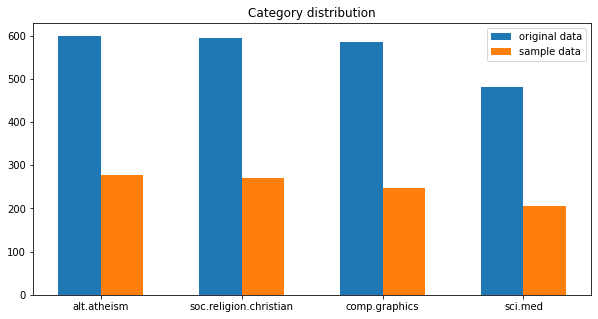

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
# Answer here
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.set_title('Category distribution')
ax.set_xticklabels(categories)
num_groups = len(categories)
width = 0.3
ind = np.arange(num_groups)
ax.set_xticks(np.add(ind,(width/2)))
x_data = X.category_name.value_counts()
sample_data = X_sample.category_name.value_counts()


r_1 = ax.bar(x=ind, height=x_data, width=width) #, fontsize = 12, figsize = (8,3)
r_2 = ax.bar(x=ind+width, height=sample_data, width=width)
ax.legend(['original data', 'sample data'])
plt.show()

### Exercise 10

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text)

# Answer here
ind = 37
print(X_counts[0:5, 0:100].toarray()[-1][ind])
print(count_vect.get_feature_names()[ind])

1
01


/Users/achi/Projects/data_mining/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Exercise 11

In [9]:
# Answer here
import seaborn as sns

# only use the top 50 features
count_vect_less = CountVectorizer(max_features=50)
X_counts_less = count_vect_less.fit_transform(X.text)

In [10]:
plot_x_less = ["term_"+str(i) for i in count_vect_less.get_feature_names()]
print(plot_x_less)
plot_y_less = ["doc_"+ str(i) for i in list(X.index[0:50])]
plot_z_less = X_counts_less[0:50, 0:50].toarray()

['term_about', 'term_all', 'term_an', 'term_and', 'term_are', 'term_as', 'term_at', 'term_be', 'term_but', 'term_by', 'term_can', 'term_com', 'term_do', 'term_edu', 'term_for', 'term_from', 'term_god', 'term_have', 'term_he', 'term_if', 'term_in', 'term_is', 'term_it', 'term_lines', 'term_my', 'term_no', 'term_not', 'term_of', 'term_on', 'term_one', 'term_or', 'term_organization', 'term_re', 'term_so', 'term_some', 'term_subject', 'term_that', 'term_the', 'term_there', 'term_they', 'term_this', 'term_to', 'term_was', 'term_we', 'term_what', 'term_will', 'term_with', 'term_would', 'term_you', 'term_your']


/Users/achi/Projects/data_mining/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


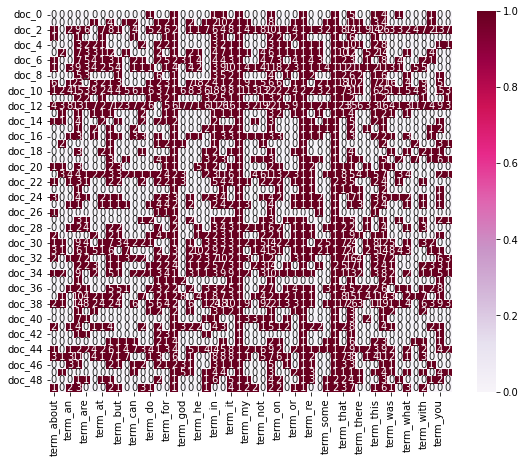

In [11]:
less_df_todraw = pd.DataFrame(plot_z_less, columns = plot_x_less, index = plot_y_less)
plt.subplots(figsize=(9, 7))
ax_less = sns.heatmap(less_df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### Exercise 12

In [12]:
# Answer here
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

X_reduced_three = PCA(n_components = 3).fit_transform(X_counts.toarray())

/Users/achi/Projects/data_mining/venv/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


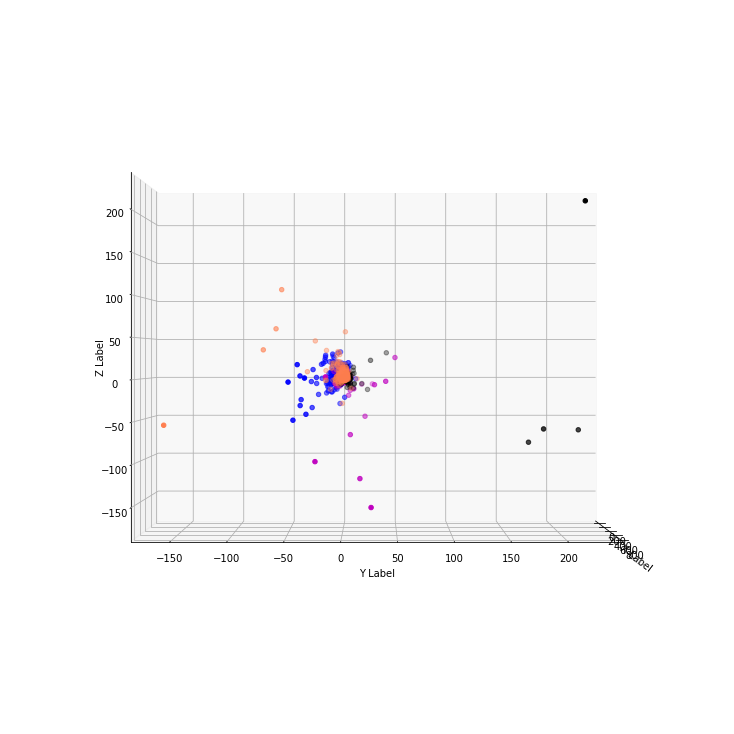

In [13]:
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)
col = ['coral', 'blue', 'black', 'm']
# 'alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med'
for c, category in zip(col, categories):
    xs = X_reduced_three[X['category_name'] == category].T[0]
    ys = X_reduced_three[X['category_name'] == category].T[1]
    zs = X_reduced_three[X['category_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
#ax.view_init(60, 180)
ax.view_init(0, 0)
#ax.view_init(60, 35)
plt.show()

### 60, 180

!["60,180"](img/screenshot1.png)

### 60, 35

!["60,35"](img/screenshot2.png)

I still don't see that much seperation in the data - the center is still stacked with different colors. However, besides some outliers, each dot is typically most proximate to a dot of the same color. I clearly see the blue, coral, and black group. There seem to be less instances of the majenta group, but they are still relatively close to each other. I wish I had an interactively rotatable graph to see more clearly, but this 3D projection still provides more value than 2D.

### Exercise 13

In [14]:
import numpy as np
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

# Answer here
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()

px_fig = px.bar(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
px_fig.show()

/Users/achi/Projects/data_mining/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



### Exercise 14

In [15]:
# Answer here
term_frequencies_small = np.asarray(X_counts_less.sum(axis=0))[0]

px_fig_small = px.bar(x=count_vect_less.get_feature_names(), 
            y=term_frequencies_small[:50])
px_fig_small.show()

/Users/achi/Projects/data_mining/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



### Exercise 15

In [16]:
zipped = sorted(zip(term_frequencies_small[:50], count_vect_less.get_feature_names()), key=lambda k: (-k[0], k[1]))
freq, names = zip(*zipped)
px_fig_small_sort = px.bar(x=names, y=freq)
px_fig_small_sort.show()

### Exercise 16

In [17]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
# Answer here
mlb2 = preprocessing.LabelBinarizer()
mlb2.fit(X.category_name)
X['bin_category_name'] = mlb2.transform(X['category_name']).tolist()
print(mlb2.classes_)

['alt.atheism' 'comp.graphics' 'sci.med' 'soc.religion.christian']


In [18]:
X[0:9]  # It works!

text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...         3   
4  From: stanly@grok11.columbiasc.ncr.com (stanly...         3   
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...         3   
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...         3   
7  From: aldridge@netcom.com (Jacquelin Aldridge)...         2   
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...         2   

            category_name bin_category_name  
0           comp.graphics      [0, 1, 0, 0]  
1           comp.graphics      [0, 1, 0, 0]  
2  soc.religion.christian      [0, 0, 0, 1]  
3  soc.religion.christian      [0, 0, 0, 1]  
4  soc.religion.christian      [0, 0, 0, 1]  
5  soc.religion.christian      [0, 0, 0, 1]  
6  soc.religion.christian      [0, 0, 0, 1]  
7                 sci.med      [0, 0, 1, 0]  
8                 sci.med      [0, 0, 1, 0]

## 2) New Dataset
I followed all of the exercises from the lab on the new dataset with both the CountVectorizer and TfidfVectorizer data.

#### 1. The Data + 2. Data Preparation + 3. Data Transformation
I combined these because the data format was different, so it made sense to directly load it as a dataframe.

#### Setup and combining data

In [21]:
import os
review_categories = ['positive', 'negative']
review_cols = ['text', 'sentiment']
df_amazon = pd.read_csv('sentiment_data/amazon_cells_labelled.txt', delimiter='\t', names=review_cols)
df_yelp = pd.read_csv('sentiment_data/yelp_labelled.txt', delimiter='\t', names=review_cols)
df_imdb = pd.read_csv('sentiment_data/imdb_labelled.txt', delimiter='\t', names=review_cols)

In [22]:
df_amazon.head()

text  sentiment
0  So there is no way for me to plug it in here i...          0
1                        Good case, Excellent value.          1
2                             Great for the jawbone.          1
3  Tied to charger for conversations lasting more...          0
4                                  The mic is great.          1

In [23]:
df_yelp.head()

text  sentiment
0                           Wow... Loved this place.          1
1                                 Crust is not good.          0
2          Not tasty and the texture was just nasty.          0
3  Stopped by during the late May bank holiday of...          1
4  The selection on the menu was great and so wer...          1

In [24]:
df_imdb.head()

text  sentiment
0  A very, very, very slow-moving, aimless movie ...          0
1  Not sure who was more lost - the flat characte...          0
2  Attempting artiness with black & white and cle...          0
3       Very little music or anything to speak of.            0
4  The best scene in the movie was when Gerardo i...          1

In [25]:
map_dict = {1: 'positive', 0: 'negative'}  # adding the sentiment names
for tup in [(df_yelp, 'yelp'), (df_imdb, 'imdb'), (df_amazon, 'amazon')]:
    tup[0]['source'] = tup[1]
    
combined_df = pd.concat([df_amazon, df_yelp, df_imdb], ignore_index=True)
combined_df.head()

text  sentiment  source
0  So there is no way for me to plug it in here i...          0  amazon
1                        Good case, Excellent value.          1  amazon
2                             Great for the jawbone.          1  amazon
3  Tied to charger for conversations lasting more...          0  amazon
4                                  The mic is great.          1  amazon

In [26]:
len(combined_df)

2748

In [27]:
combined_df['sentiment_name'] = combined_df.sentiment.map(map_dict)
combined_df.head()

text  sentiment  source  \
0  So there is no way for me to plug it in here i...          0  amazon   
1                        Good case, Excellent value.          1  amazon   
2                             Great for the jawbone.          1  amazon   
3  Tied to charger for conversations lasting more...          0  amazon   
4                                  The mic is great.          1  amazon   

  sentiment_name  
0       negative  
1       positive  
2       positive  
3       negative  
4       positive

In [28]:
print(combined_df.text[0], combined_df.sentiment[1])
print(combined_df.sentiment_name[:10])
print(combined_df.text[:3])

So there is no way for me to plug it in here in the US unless I go by a converter. 1
0    negative
1    positive
2    positive
3    negative
4    positive
5    negative
6    negative
7    positive
8    negative
9    negative
Name: sentiment_name, dtype: object
0    So there is no way for me to plug it in here i...
1                          Good case, Excellent value.
2                               Great for the jawbone.
Name: text, dtype: object


In [29]:
combined_df[0:10][["text", "sentiment_name"]]

text sentiment_name
0  So there is no way for me to plug it in here i...       negative
1                        Good case, Excellent value.       positive
2                             Great for the jawbone.       positive
3  Tied to charger for conversations lasting more...       negative
4                                  The mic is great.       positive
5  I have to jiggle the plug to get it to line up...       negative
6  If you have several dozen or several hundred c...       negative
7        If you are Razr owner...you must have this!       positive
8                Needless to say, I wasted my money.       negative
9                   What a waste of money and time!.       negative

In [30]:
combined_df[-10:]

text  sentiment source  \
2738  The opening sequence of this gem is a classic,...          1   imdb   
2739             Fans of the genre will be in heaven.            1   imdb   
2740                Lange had become a great actress.            1   imdb   
2741                It looked like a wonderful story.            1   imdb   
2742            I never walked out of a movie faster.            0   imdb   
2743  I just got bored watching Jessice Lange take h...          0   imdb   
2744  Unfortunately, any virtue in this film's produ...          0   imdb   
2745                   In a word, it is embarrassing.            0   imdb   
2746                               Exceptionally bad!            0   imdb   
2747  All in all its an insult to one's intelligence...          0   imdb   

     sentiment_name  
2738       positive  
2739       positive  
2740       positive  
2741       positive  
2742       negative  
2743       negative  
2744       negative  
2745       negative  
2746       negative  
2747       negative

In [31]:
combined_df.iloc[::10, 0:2][0:10]

text  sentiment
0   So there is no way for me to plug it in here i...          0
10                    And the sound quality is great.          1
20  I went on Motorola's website and followed all ...          0
30  This is a simple little phone to use, but the ...          0
40  It has a great camera thats 2MP, and the pics ...          1
50  Not loud enough and doesn't turn on like it sh...          0
60  Essentially you can forget Microsoft's tech su...          0
70                                  Mic Doesn't work.          0
80      I wear it everyday and it holds up very well.          1
90  For a product that costs as much as this one d...          0

In [32]:
combined_df.loc[::10, 'text'][0:10]

0     So there is no way for me to plug it in here i...
10                      And the sound quality is great.
20    I went on Motorola's website and followed all ...
30    This is a simple little phone to use, but the ...
40    It has a great camera thats 2MP, and the pics ...
50    Not loud enough and doesn't turn on like it sh...
60    Essentially you can forget Microsoft's tech su...
70                                    Mic Doesn't work.
80        I wear it everyday and it holds up very well.
90    For a product that costs as much as this one d...
Name: text, dtype: object

In [33]:
combined_df[::10][0:10]

text  sentiment  source  \
0   So there is no way for me to plug it in here i...          0  amazon   
10                    And the sound quality is great.          1  amazon   
20  I went on Motorola's website and followed all ...          0  amazon   
30  This is a simple little phone to use, but the ...          0  amazon   
40  It has a great camera thats 2MP, and the pics ...          1  amazon   
50  Not loud enough and doesn't turn on like it sh...          0  amazon   
60  Essentially you can forget Microsoft's tech su...          0  amazon   
70                                  Mic Doesn't work.          0  amazon   
80      I wear it everyday and it holds up very well.          1  amazon   
90  For a product that costs as much as this one d...          0  amazon   

   sentiment_name  
0        negative  
10       positive  
20       negative  
30       negative  
40       positive  
50       negative  
60       negative  
70       negative  
80       positive  
90       negative

In [34]:
# first three rows excluding category number
print(combined_df.loc[[0, 1, 2], ::2])
# get cat name of 3rd row (row 2)
print(combined_df.at[2, "sentiment_name"])
# get cat name of 2nd row (row 1)
print(combined_df.iat[1,2])
# get the first 10 instances of rows that aren't of the category comp graphics
print(combined_df['sentiment_name'].loc[lambda s: s == 'negative'][:10])
# print first 3 instances of rows that are of the first 3 categories
print(combined_df[combined_df['sentiment'] < 1][:3])
# same as above
print(combined_df.query('sentiment < 1')[:3])

                                                text  source
0  So there is no way for me to plug it in here i...  amazon
1                        Good case, Excellent value.  amazon
2                             Great for the jawbone.  amazon
positive
amazon
0     negative
3     negative
5     negative
6     negative
8     negative
9     negative
12    negative
14    negative
16    negative
19    negative
Name: sentiment_name, dtype: object
                                                text  sentiment  source  \
0  So there is no way for me to plug it in here i...          0  amazon   
3  Tied to charger for conversations lasting more...          0  amazon   
5  I have to jiggle the plug to get it to line up...          0  amazon   

  sentiment_name  
0       negative  
3       negative  
5       negative  
                                                text  sentiment  source  \
0  So there is no way for me to plug it in here i...          0  amazon   
3  Tied to charger for conv

In [35]:
combined_df.loc[combined_df['sentiment'] == 1].iloc[::10, 0:3][0:5] 

text  sentiment  source
1                         Good case, Excellent value.          1  amazon
21  I bought this to use with my Kindle Fire and a...          1  amazon
44                       Excellent bluetooth headset.          1  amazon
61  I really recommend this faceplates since it lo...          1  amazon
78  I love this phone , It is very handy and has a...          1  amazon

#### 4. Data Mining using Pandas

In [36]:
combined_df.isnull()

text  sentiment  source  sentiment_name
0     False      False   False           False
1     False      False   False           False
2     False      False   False           False
3     False      False   False           False
4     False      False   False           False
...     ...        ...     ...             ...
2743  False      False   False           False
2744  False      False   False           False
2745  False      False   False           False
2746  False      False   False           False
2747  False      False   False           False

[2748 rows x 4 columns]

In [37]:
combined_df.isnull().apply(lambda x: dmh.check_missing_values(x))

text                           sentiment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                               source                      sentiment_name  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

In [38]:
combined_df.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0       (The amoung of missing records is: , 0)
1       (The amoung of missing records is: , 0)
2       (The amoung of missing records is: , 0)
3       (The amoung of missing records is: , 0)
4       (The amoung of missing records is: , 0)
                         ...                   
2743    (The amoung of missing records is: , 0)
2744    (The amoung of missing records is: , 0)
2745    (The amoung of missing records is: , 0)
2746    (The amoung of missing records is: , 0)
2747    (The amoung of missing records is: , 0)
Length: 2748, dtype: object

In [39]:
dummy_series = pd.Series(["dummy_record", 1], index=["text", "sentiment"])
dummy_series

text         dummy_record
sentiment               1
dtype: object

In [40]:
result_with_series = combined_df.append(dummy_series, ignore_index=True)

In [41]:
print(len(result_with_series))
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

2749


text                           sentiment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                               source                      sentiment_name  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   1                                   1

In [42]:
dummy_dict = [{'text': 'dummy_record',
               'sentiment': 1
              }]
combined_df = combined_df.append(dummy_dict, ignore_index=True)
print(len(combined_df))

2749


In [43]:
combined_df.isnull().apply(lambda x: dmh.check_missing_values(x))

text                           sentiment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                               source                      sentiment_name  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   1                                   1

In [44]:
combined_df.dropna(inplace=True)
combined_df.isnull().apply(lambda x: dmh.check_missing_values(x))

text                           sentiment  \
0  The amoung of missing records is:   The amoung of missing records is:    
1                                   0                                   0   

                               source                      sentiment_name  
0  The amoung of missing records is:   The amoung of missing records is:   
1                                   0                                   0

In [45]:
len(combined_df)

2748

In [46]:
combined_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2743    False
2744    False
2745    False
2746    False
2747    False
Length: 2748, dtype: bool

In [47]:
sum(combined_df.duplicated())

17

In [48]:
sum(combined_df.duplicated('text'))

17

In [49]:
combined_df.drop_duplicates(keep=False, inplace=True)
len(combined_df)

2714

#### 5. Data Preprocessing

In [50]:
sent_sample = combined_df.sample(n=1000, random_state=42) #random state
print(len(sent_sample))
sent_sample[0:4]

1000


text  sentiment  source  \
517   I received my orders well within the shipping ...          1  amazon   
2043                         Too politically correct.            0    imdb   
1935                          This place lacked style!!          0    yelp   
950                                 It is a joy to use.          1  amazon   

     sentiment_name  
517        positive  
2043       negative  
1935       negative  
950        positive

In [51]:
print(sent_sample[0:1])
print(combined_df[0:1])
print(combined_df.loc[517])
print(sent_sample.loc[517])

                                                  text  sentiment  source  \
517  I received my orders well within the shipping ...          1  amazon   

    sentiment_name  
517       positive  
                                                text  sentiment  source  \
0  So there is no way for me to plug it in here i...          0  amazon   

  sentiment_name  
0       negative  
text              I received my orders well within the shipping ...
sentiment                                                         1
source                                                       amazon
sentiment_name                                             positive
Name: 517, dtype: object
text              I received my orders well within the shipping ...
sentiment                                                         1
source                                                       amazon
sentiment_name                                             positive
Name: 517, dtype: object


negative    504
positive    496
Name: sentiment_name, dtype: int64


<AxesSubplot:title={'center':'Sentiment distribution'}>

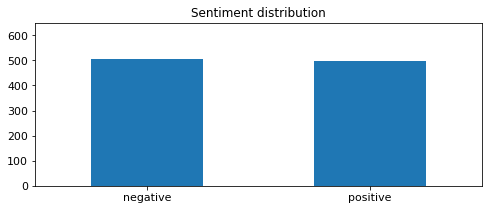

In [52]:
print(sent_sample.sentiment_name.value_counts())

# plot barchart for X_sample
sent_sample.sentiment_name.value_counts().plot(kind = 'bar',
                                    title = 'Sentiment distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

negative    504
positive    496
Name: sentiment_name, dtype: int64


<AxesSubplot:title={'center':'Sentiment distribution'}>

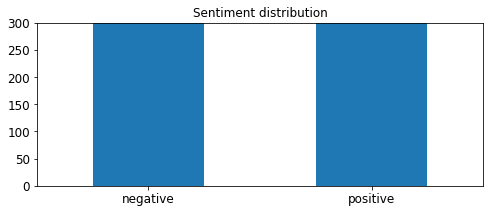

In [53]:
print(sent_sample.sentiment_name.value_counts())

# plot barchart for X_sample
sent_sample.sentiment_name.value_counts().plot(kind = 'bar',
                                           title = 'Sentiment distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

<AxesSubplot:title={'center':'Sentiment distribution'}>

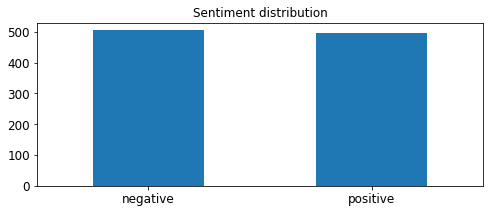

In [54]:
sent_sample.sentiment_name.value_counts().plot(kind = 'bar',
                                           title = 'Sentiment distribution',
                                           rot = 0, fontsize = 12, figsize = (8,3))

/Users/achi/Projects/data_mining/venv/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning:

FixedFormatter should only be used together with FixedLocator



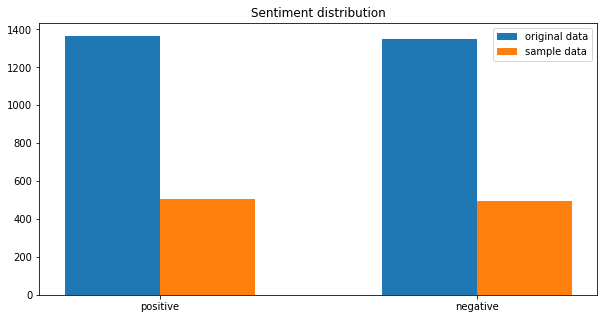

In [55]:
# Answer here
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.set_title('Sentiment distribution')
ax.set_xticklabels(review_categories)
num_groups = len(review_categories)
width = 0.3
ind = np.arange(num_groups)
ax.set_xticks(np.add(ind,(width/2)))
df_data = combined_df.sentiment_name.value_counts()
s_data = sent_sample.sentiment_name.value_counts()


r_1 = ax.bar(x=ind, height=df_data, width=width) #, fontsize = 12, figsize = (8,3)
r_2 = ax.bar(x=ind+width, height=s_data, width=width)
ax.legend(['original data', 'sample data'])
plt.show()

In [56]:
import nltk

combined_df['unigrams'] = combined_df['text'].apply(lambda x: dmh.tokenize_text(x))
combined_df[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [57]:
combined_df[0:4]

text  sentiment  source  \
0  So there is no way for me to plug it in here i...          0  amazon   
1                        Good case, Excellent value.          1  amazon   
2                             Great for the jawbone.          1  amazon   
3  Tied to charger for conversations lasting more...          0  amazon   

  sentiment_name                                           unigrams  
0       negative  [So, there, is, no, way, for, me, to, plug, it...  
1       positive               [Good, case, ,, Excellent, value, .]  
2       positive                      [Great, for, the, jawbone, .]  
3       negative  [Tied, to, charger, for, conversations, lastin...

In [58]:
list(combined_df[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

### 3) Models

Generate meaningful new data visualizations. Refer to online resources and the Data Mining textbook for inspiration and ideas.
Generate TF-IDF features from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn guide .
Implement a simple Naive Bayes classifier that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences. Refer to this article.

#### Set up TF-IDF and Count vectorizers

In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [60]:
tfidf = TfidfVectorizer()
tfidf_embeddings = tfidf.fit_transform(combined_df.text)

In [61]:
tfidf_analyze = tfidf.build_analyzer()
print(tfidf_analyze(combined_df.text[0]))

['so', 'there', 'is', 'no', 'way', 'for', 'me', 'to', 'plug', 'it', 'in', 'here', 'in', 'the', 'us', 'unless', 'go', 'by', 'converter']


In [62]:
countvec = CountVectorizer()
count_embeds = countvec.fit_transform(combined_df.text)

In [63]:
print(tfidf_embeddings.shape)
print(count_embeds.shape)
print(tfidf.get_feature_names()[0:10])
print(countvec.get_feature_names()[0:10])

(2714, 5153)
(2714, 5153)
['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']
['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17']


/Users/achi/Projects/data_mining/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [64]:
print(tfidf_embeddings[0:5, 0:10].toarray())
print(count_embeds[0:5, 0:10].toarray())

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [65]:
countvec.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [66]:
tfidf.transform(['Something completely new.']).toarray()

array([[0., 0., 0., ..., 0., 0., 0.]])

In [67]:
plot_x = ["term_"+str(i) for i in countvec.get_feature_names()[0:20]]
plot_x

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [68]:
plot_y = ["doc_"+ str(i) for i in list(combined_df.index)[0:20]]
plot_z_count = count_embeds[0:20, 0:20].toarray()

In [69]:
plot_z_tfidf = tfidf_embeddings[0:20, 0:20].toarray()

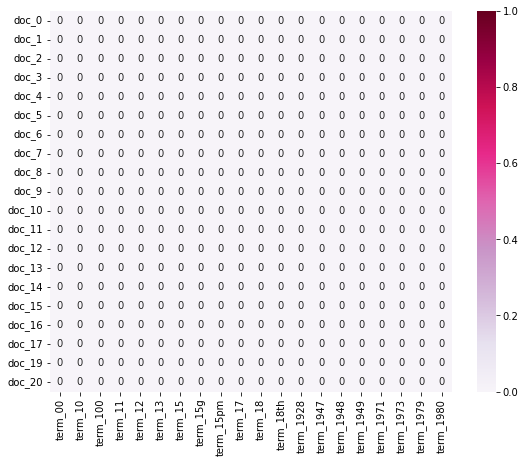

In [70]:
df_todraw = pd.DataFrame(plot_z_tfidf, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [71]:
countvec_less = CountVectorizer(max_features=50)
count_embeds_less = countvec_less.fit_transform(combined_df.text)

tfidf_less = TfidfVectorizer(max_features=50)
tfidf_embeds_less = tfidf_less.fit_transform(combined_df.text)

In [72]:
plot_x_less = ["term_"+str(i) for i in countvec_less.get_feature_names()]
print(plot_x_less)
plot_y_less = ["doc_"+ str(i) for i in list(combined_df.index[0:50])]
plot_z_counts_less = count_embeds_less[0:50, 0:50].toarray()
plot_z_tfidf_less = tfidf_embeds_less[0:50, 0:50].toarray()

['term_all', 'term_an', 'term_and', 'term_are', 'term_as', 'term_at', 'term_bad', 'term_be', 'term_but', 'term_film', 'term_food', 'term_for', 'term_from', 'term_good', 'term_great', 'term_had', 'term_has', 'term_have', 'term_if', 'term_in', 'term_is', 'term_it', 'term_just', 'term_like', 'term_movie', 'term_my', 'term_not', 'term_of', 'term_on', 'term_one', 'term_out', 'term_phone', 'term_place', 'term_really', 'term_service', 'term_so', 'term_that', 'term_the', 'term_there', 'term_they', 'term_this', 'term_time', 'term_to', 'term_very', 'term_was', 'term_we', 'term_well', 'term_were', 'term_with', 'term_you']


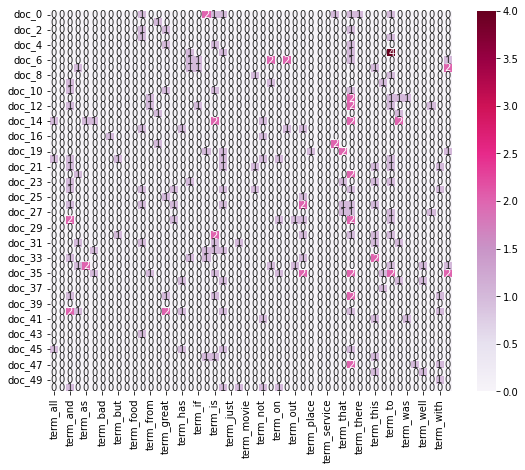

In [73]:
# Count vectorizer heatmap
less_count_df_todraw = pd.DataFrame(plot_z_counts_less, columns = plot_x_less, index = plot_y_less)
plt.subplots(figsize=(9, 7))
ax_less = sns.heatmap(less_count_df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=4, annot=True)

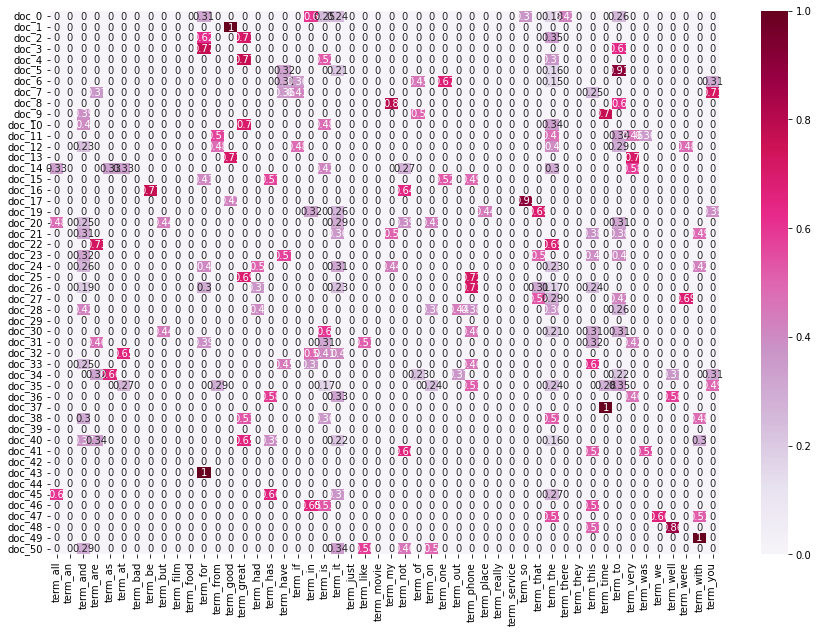

In [74]:
# Tfidf vectorizer heatmap
less_tfidf_df_todraw = pd.DataFrame(plot_z_tfidf_less, columns = plot_x_less, index = plot_y_less)
plt.subplots(figsize=(15, 10))
ax_less = sns.heatmap(less_tfidf_df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

In [75]:
from sklearn.decomposition import PCA

combined_tfidf_reduced = PCA(n_components = 2).fit_transform(tfidf_embeddings.toarray())
combined_count_reduced = PCA(n_components = 2).fit_transform(count_embeds.toarray())
combined_tfidf_reduced.shape

(2714, 2)

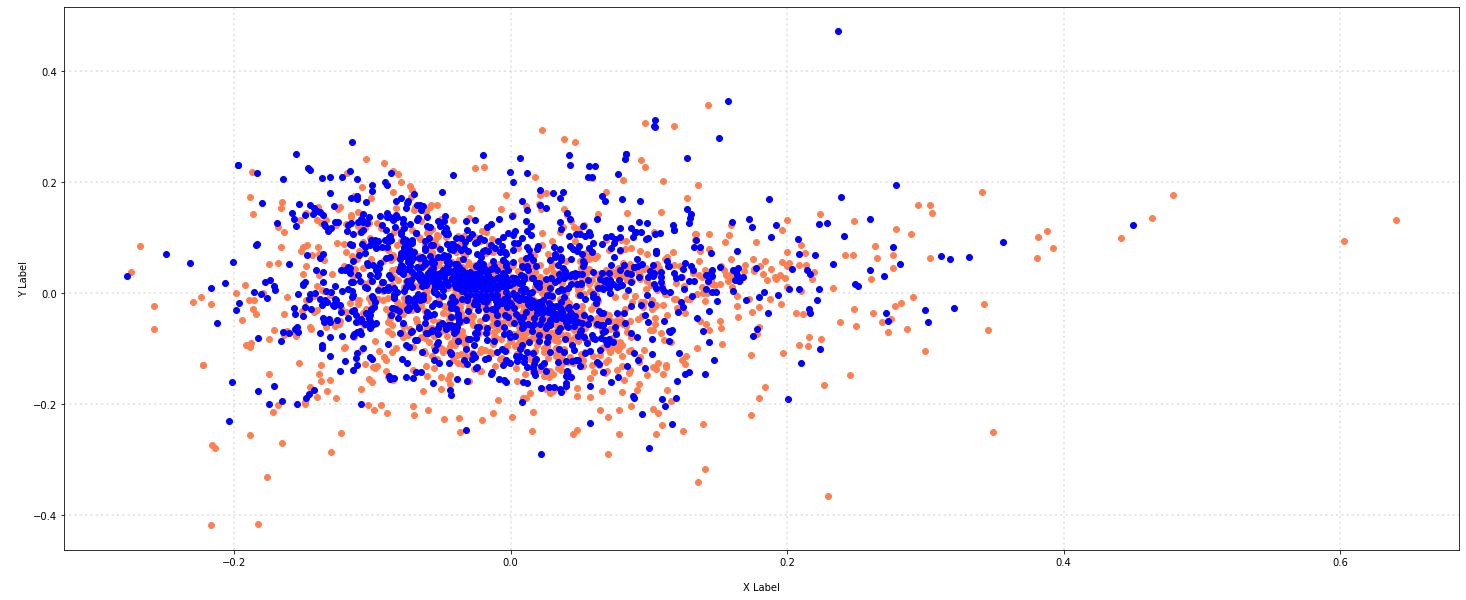

In [76]:
# TFIDF 2D
colors = ['coral', 'blue']
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(colors, review_categories):
    xs = combined_tfidf_reduced[combined_df['sentiment_name'] == category].T[0]
    ys = combined_tfidf_reduced[combined_df['sentiment_name'] == category].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

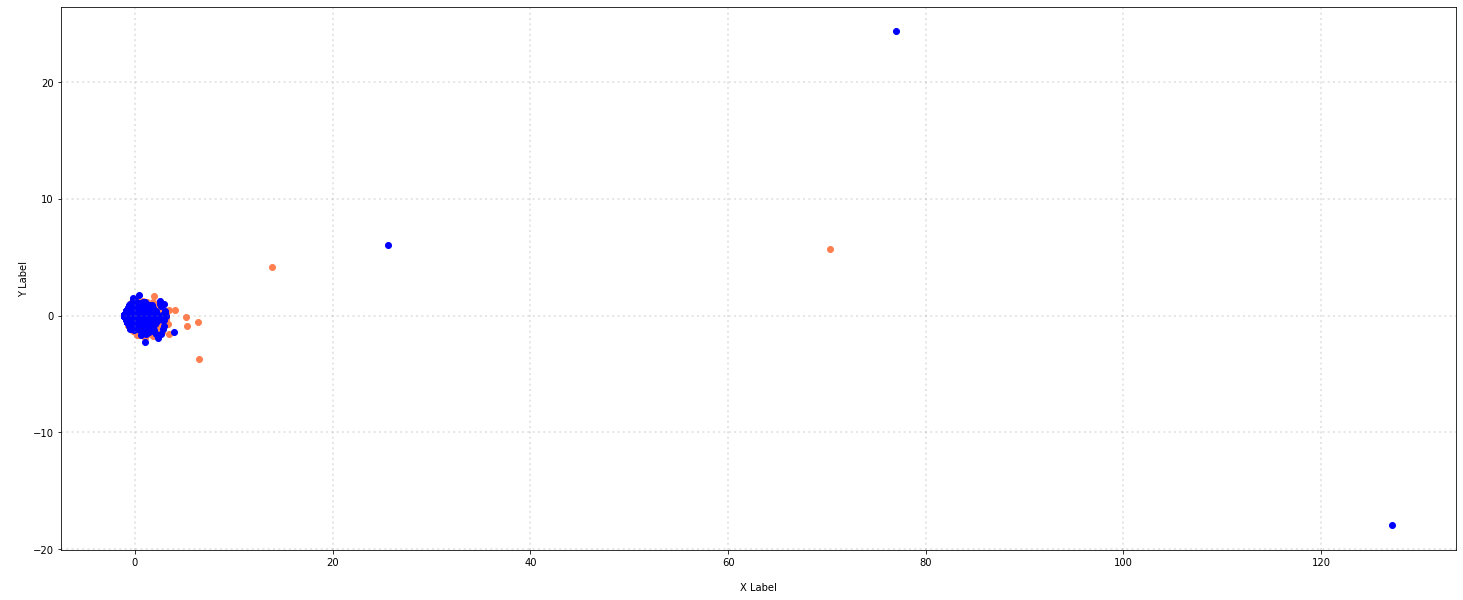

In [77]:
# Counts 2D
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(colors, review_categories):
    xs = combined_count_reduced[combined_df['sentiment_name'] == category].T[0]
    ys = combined_count_reduced[combined_df['sentiment_name'] == category].T[1]
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

In [78]:
tfidf_reduced_three = PCA(n_components = 3).fit_transform(tfidf_embeddings.toarray())
count_reduced_three = PCA(n_components = 3).fit_transform(count_embeds.toarray())

/Users/achi/Projects/data_mining/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



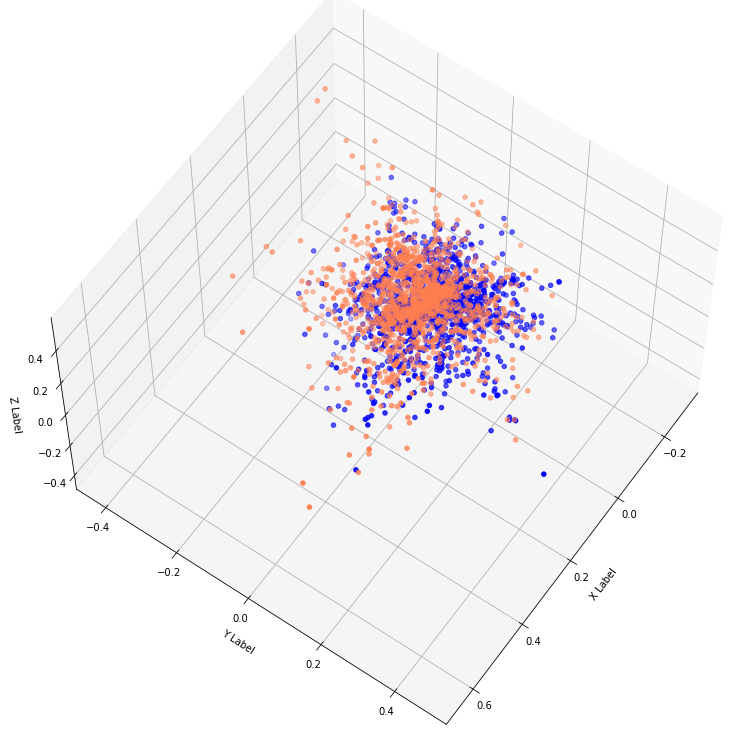

In [79]:
# For TFIDF
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)

for c, category in zip(colors, review_categories):
    xs = tfidf_reduced_three[combined_df['sentiment_name'] == category].T[0]
    ys = tfidf_reduced_three[combined_df['sentiment_name'] == category].T[1]
    zs = tfidf_reduced_three[combined_df['sentiment_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(60, 35)
#ax.view_init(10, 100)
#ax.view_init(0, 0)
plt.show()

10, 100

!["10,100"](img/tfidf_10_100.png)

0, 0

!["0,0"](img/tfidf00.png)

I tried many more angles and still don't see super clear separation between the two classes. However, certain angles show a different class as being "on top" of the other, which indicates separation. For example, the 0,0 above has orange on top, and 10,100 has blue on top.

/Users/achi/Projects/data_mining/venv/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



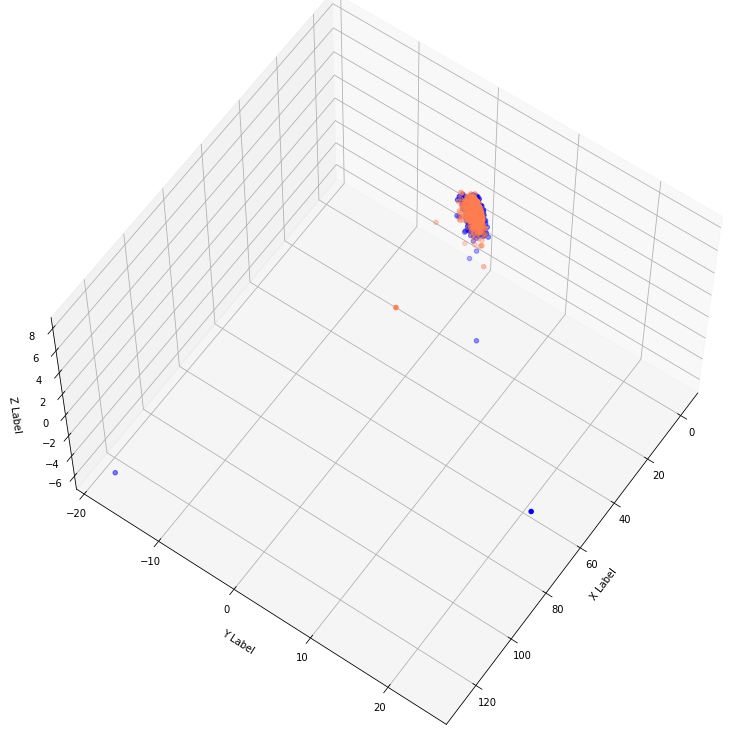

In [80]:
# For counts
fig = plt.figure(figsize = (25,10))
ax = Axes3D(fig)

for c, category in zip(colors, review_categories):
    xs = count_reduced_three[combined_df['sentiment_name'] == category].T[0]
    ys = count_reduced_three[combined_df['sentiment_name'] == category].T[1]
    zs = count_reduced_three[combined_df['sentiment_name'] == category].T[2]
    ax.scatter(xs, ys, zs, c = c, marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(60, 35)
#ax.view_init(10, 100)
#ax.view_init(0, 0)
plt.show()

10, 100

!["10,100"](img/count_10_100.png)

0, 0

!["0,0"](img/count00.png)

I'm seeing less separation than with TFIDF, but still, it looks a bit different from different angles.

In [81]:
term_frequencies = np.asarray(count_embeds.sum(axis=0))[0]
tfidf_freqs = np.asarray(tfidf_embeddings.sum(axis=0))[0]

In [82]:
print(term_frequencies[0])
print(tfidf_freqs[0])

1
0.33917497936054597


/Users/achi/Projects/data_mining/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/Users/achi/Projects/data_mining/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



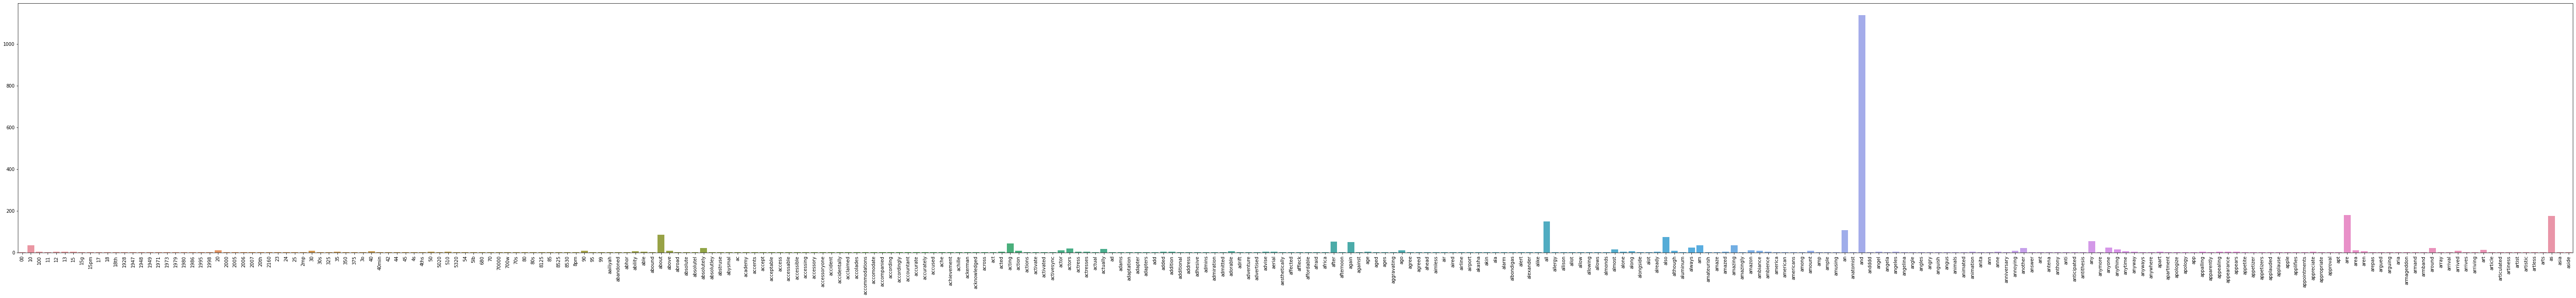

In [83]:
# The count vectorizer plot
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=countvec.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(countvec.get_feature_names()[:300], rotation = 90);

/Users/achi/Projects/data_mining/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



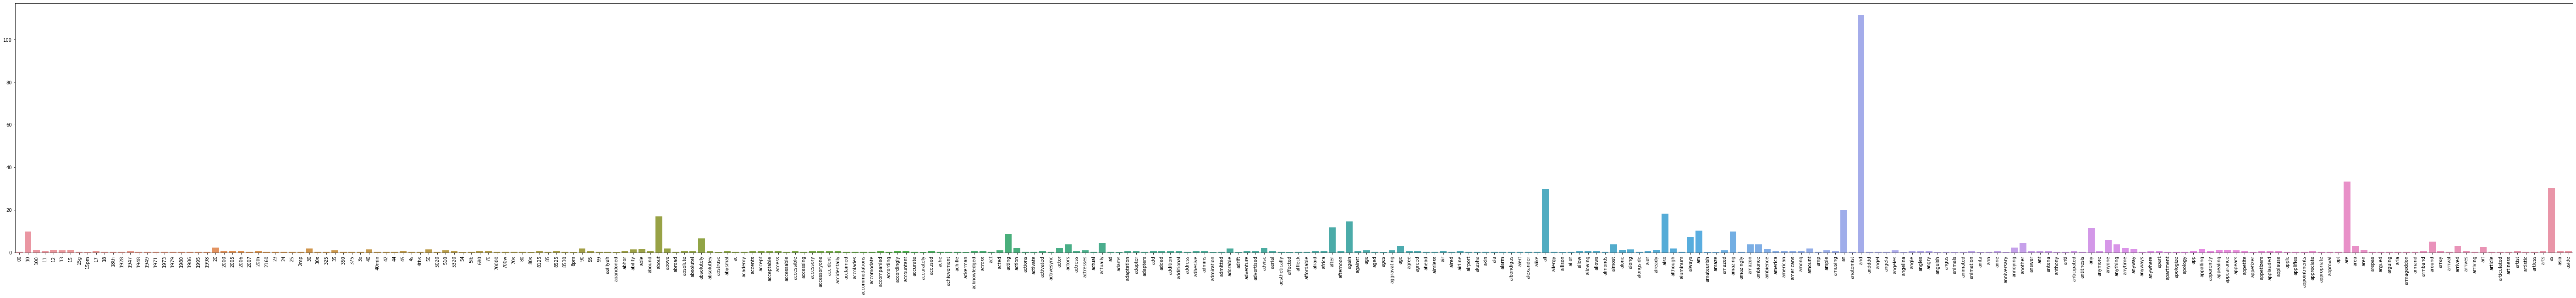

In [84]:
# The count vectorizer plot
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=tfidf.get_feature_names()[:300], 
            y=tfidf_freqs[:300])
g.set_xticklabels(tfidf.get_feature_names()[:300], rotation = 90);

In [85]:
px_fig_c = px.bar(x=countvec.get_feature_names()[:300], 
            y=term_frequencies[:300])
px_fig_c.show()

In [86]:
px_fig_tfidf = px.bar(x=tfidf.get_feature_names()[:300], 
            y=tfidf_freqs[:300])
px_fig_tfidf.show()

In [87]:
term_freqs_small = np.asarray(count_embeds_less.sum(axis=0))[0]
tfidf_freqs_small = np.asarray(tfidf_embeds_less.sum(axis=0))[0]

In [88]:
zipped_count = sorted(zip(term_freqs_small[:50], countvec_less.get_feature_names()), key=lambda k: (-k[0], k[1]))
freq, names = zip(*zipped_count)
px_count_fig_small_sort = px.bar(x=names, y=freq)
px_count_fig_small_sort.show()

In [89]:
zipped_tfidf = sorted(zip(tfidf_freqs_small[:50], tfidf_less.get_feature_names()), key=lambda k: (-k[0], k[1]))
freq, names = zip(*zipped_tfidf)
px_tfidf_fig_small_sort = px.bar(x=names, y=freq)
px_tfidf_fig_small_sort.show()

/Users/achi/Projects/data_mining/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



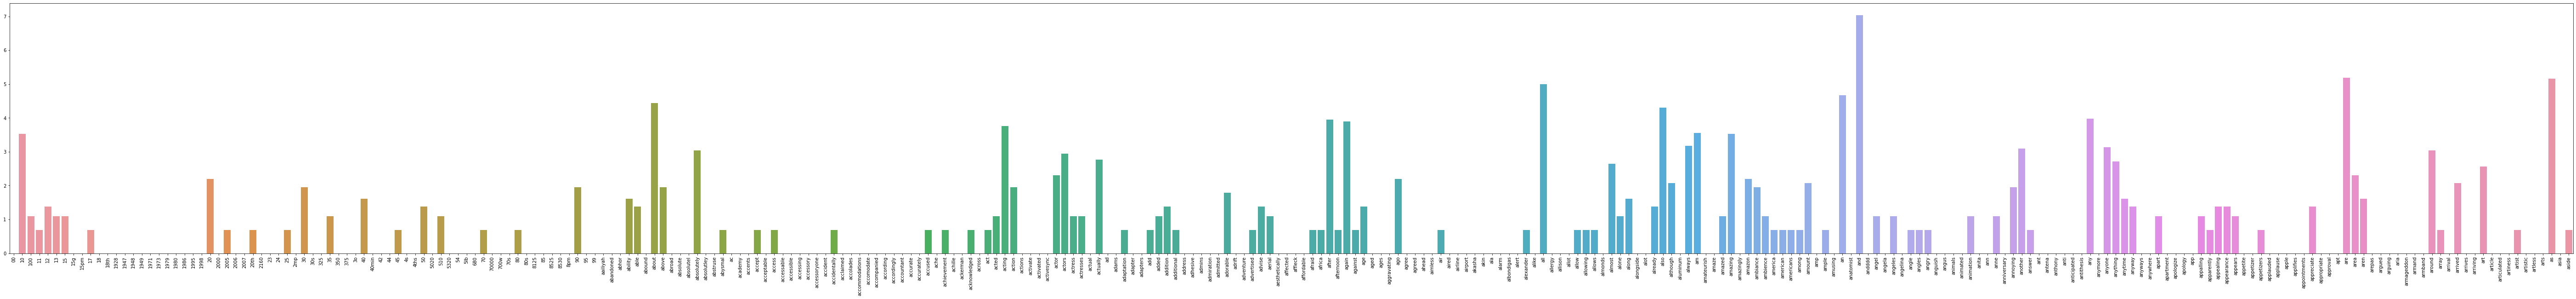

In [90]:
import math

term_frequencies_log = [math.log(i) for i in term_frequencies]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=countvec.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(countvec.get_feature_names()[:300], rotation = 90);

/Users/achi/Projects/data_mining/venv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



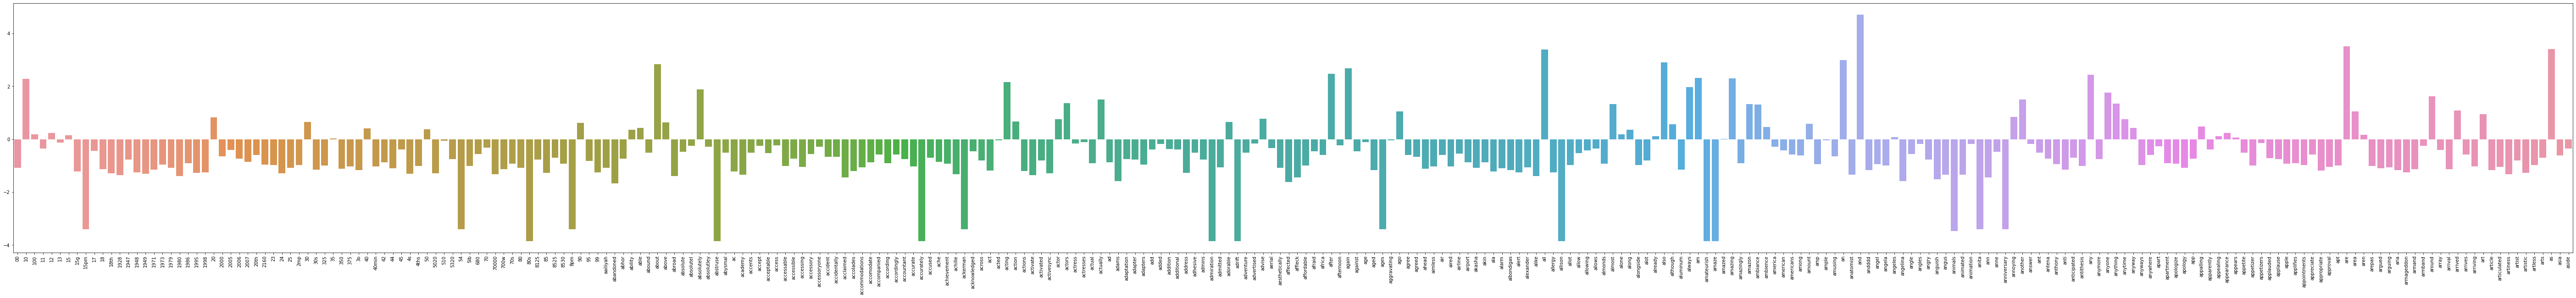

In [91]:
tfidf_frequencies_log = [math.log(i) for i in tfidf_freqs]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=tfidf.get_feature_names()[:300],
                y=tfidf_frequencies_log[:300])
g.set_xticklabels(tfidf.get_feature_names()[:300], rotation = 90);

In [92]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

mlb = preprocessing.LabelBinarizer()
mlb.fit(combined_df.sentiment)
mlb.classes_

array([0, 1])

In [93]:
combined_df['bin_sentiment'] = mlb.transform(combined_df['sentiment']).tolist()
combined_df[0:9]

text  sentiment  source  \
0  So there is no way for me to plug it in here i...          0  amazon   
1                        Good case, Excellent value.          1  amazon   
2                             Great for the jawbone.          1  amazon   
3  Tied to charger for conversations lasting more...          0  amazon   
4                                  The mic is great.          1  amazon   
5  I have to jiggle the plug to get it to line up...          0  amazon   
6  If you have several dozen or several hundred c...          0  amazon   
7        If you are Razr owner...you must have this!          1  amazon   
8                Needless to say, I wasted my money.          0  amazon   

  sentiment_name                                           unigrams  \
0       negative  [So, there, is, no, way, for, me, to, plug, it...   
1       positive               [Good, case, ,, Excellent, value, .]   
2       positive                      [Great, for, the, jawbone, .]   
3       negative  [Tied, to, charger, for, conversations, lastin...   
4       positive                           [The, mic, is, great, .]   
5       negative  [I, have, to, jiggle, the, plug, to, get, it, ...   
6       negative  [If, you, have, several, dozen, or, several, h...   
7       positive  [If, you, are, Razr, owner, ..., you, must, ha...   
8       negative    [Needless, to, say, ,, I, wasted, my, money, .]   

  bin_sentiment  
0           [0]  
1           [1]  
2           [1]  
3           [0]  
4           [1]  
5           [0]  
6           [0]  
7           [1]  
8           [0]

In [94]:
mlb2 = preprocessing.LabelBinarizer()
mlb2.fit(combined_df.sentiment_name)
combined_df['bin_sentiment_name'] = mlb2.transform(combined_df['sentiment_name']).tolist()
print(mlb2.classes_)
combined_df.head()

['negative' 'positive']


text  sentiment  source  \
0  So there is no way for me to plug it in here i...          0  amazon   
1                        Good case, Excellent value.          1  amazon   
2                             Great for the jawbone.          1  amazon   
3  Tied to charger for conversations lasting more...          0  amazon   
4                                  The mic is great.          1  amazon   

  sentiment_name                                           unigrams  \
0       negative  [So, there, is, no, way, for, me, to, plug, it...   
1       positive               [Good, case, ,, Excellent, value, .]   
2       positive                      [Great, for, the, jawbone, .]   
3       negative  [Tied, to, charger, for, conversations, lastin...   
4       positive                           [The, mic, is, great, .]   

  bin_sentiment bin_sentiment_name  
0           [0]                [0]  
1           [1]                [1]  
2           [1]                [1]  
3           [0]                [0]  
4           [1]                [1]

### 6. Data Exploration

In [95]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = combined_df.iloc[50]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = combined_df.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = combined_df.iloc[150]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [96]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [97]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = countvec.transform(document_to_transform_1)
document_vector_count_2 = countvec.transform(document_to_transform_2)
document_vector_count_3 = countvec.transform(document_to_transform_3)

doc_vec_tfidf_1 = tfidf.transform(document_to_transform_1)
doc_vec_tfidf_2 = tfidf.transform(document_to_transform_2)
doc_vec_tfidf_3 = tfidf.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for absence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

doc_vec_tfidf_1_bin = binarize(document_vector_count_1)
doc_vec_tfidf_2_bin = binarize(doc_vec_tfidf_1)
doc_vec_tfidf_3_bin = binarize(doc_vec_tfidf_3)


# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

print("TF-IDF vectors:")
for doc in [doc_vec_tfidf_1_bin, doc_vec_tfidf_2_bin, doc_vec_tfidf_3_bin]:
    print(doc.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
TF-IDF vectors:
[[0 0 0 ... 0 0 0]]
[[0. 0. 0. ... 0. 0. 0.]]
[[0. 0. 0. ... 0. 0. 0.]]


In [98]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


In [99]:
print("Cosine Similarity using tfidf bw 1 and 2:")
print(cosine_similarity(doc_vec_tfidf_1, doc_vec_tfidf_2, dense_output=True))
print("Cosine Similarity using tfidf bw 1 and 3:")
print(cosine_similarity(doc_vec_tfidf_1, doc_vec_tfidf_3, dense_output=True))
print("Cosine Similarity using tfidf bw 1 and 1:")
print(cosine_similarity(doc_vec_tfidf_1, doc_vec_tfidf_1, dense_output=True))
print("Cosine Similarity using tfidf bw 2 and 2:")
print(cosine_similarity(doc_vec_tfidf_2, doc_vec_tfidf_2, dense_output=True))

Cosine Similarity using tfidf bw 1 and 2:
[[0.]]
Cosine Similarity using tfidf bw 1 and 3:
[[0.]]
Cosine Similarity using tfidf bw 1 and 1:
[[1.]]
Cosine Similarity using tfidf bw 2 and 2:
[[1.]]


## 3) TF-IDF Naive Bayes
I created some new visualizations at the end of this section.

#### Split the data into train and test sets that have the same random seed for comparison
Use small test size because the amount of data is small

In [100]:
from sklearn.model_selection import train_test_split

xcount_train, xcount_test, ycount_train, ycount_label_test = train_test_split(count_embeds, combined_df.sentiment, test_size=0.15, random_state=42)
xtfidf_train, xtfidf_test, ytfidf_train, ytfidf_label_test = train_test_split(tfidf_embeddings, combined_df.sentiment, test_size=0.15, random_state=42)

In [101]:
print(ycount_label_test[:10])
print(ytfidf_label_test[:10])

517     1
2043    0
1935    0
950     1
2711    1
288     0
424     0
2480    1
2405    0
2304    1
Name: sentiment, dtype: int64
517     1
2043    0
1935    0
950     1
2711    1
288     0
424     0
2480    1
2405    0
2304    1
Name: sentiment, dtype: int64


#### Create a MultinomialNB classifier for each type of embedding

In [102]:
from sklearn.naive_bayes import MultinomialNB

nb_model_count = MultinomialNB()
nb_model_count.fit(xcount_train, ycount_train)

nb_model_tfidf = MultinomialNB()
nb_model_tfidf.fit(xtfidf_train, ytfidf_train)

MultinomialNB()

#### Get accuracy and confusion matrix for each model on test data

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay

In [104]:
count_nb_preds = nb_model_count.predict(xcount_test)
count_acc = accuracy_score(ycount_label_test, count_nb_preds)
print(f"Countvec test accuracy: {count_acc}")
count_confusion = confusion_matrix(ycount_label_test, count_nb_preds)
print(f"Countvec confusion matrix: {count_confusion}")

Countvec test accuracy: 0.821078431372549
Countvec confusion matrix: [[168  35]
 [ 38 167]]


In [105]:
tfidf_nb_preds = nb_model_tfidf.predict(xtfidf_test)
tfidf_acc = accuracy_score(ytfidf_label_test, tfidf_nb_preds)
print(f"TF-IDF test accuracy: {tfidf_acc}")
tfidf_confusion = confusion_matrix(ytfidf_label_test, tfidf_nb_preds)
print(f"TF-IDF confusion matrix: {tfidf_confusion}")

TF-IDF test accuracy: 0.8431372549019608
TF-IDF confusion matrix: [[171  32]
 [ 32 173]]


In [106]:
disp_count = ConfusionMatrixDisplay(confusion_matrix=count_confusion, display_labels=nb_model_count.classes_)
disp_tfidf = ConfusionMatrixDisplay(confusion_matrix=tfidf_confusion, display_labels=nb_model_tfidf.classes_)

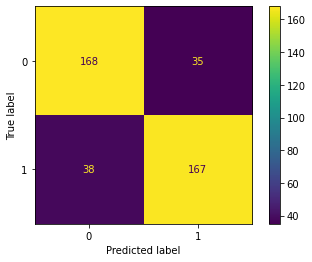

In [107]:
disp_count.plot()
plt.show()

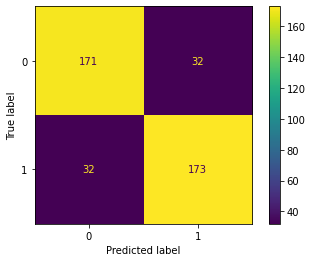

In [108]:
disp_tfidf.plot()
plt.show()

In [109]:
# accuracy for different probabilities
test_probs_count = nb_model_count.predict_proba(xcount_test)
chosen_probs_count_list = [max(p[0], p[1]) for p in test_probs_count]
test_probs_tfidf = nb_model_tfidf.predict_proba(xtfidf_test)
chosen_probs_tfidf_list = [max(p[0], p[1]) for p in test_probs_tfidf]

In [110]:
sample_200 = sent_sample.text[0:200].to_numpy()
count_sample = countvec.transform(sample_200)
tfidf_sample = tfidf.transform(sample_200)
count_sample_probs = nb_model_count.predict_proba(count_sample)
tfidf_sample_probs = nb_model_tfidf.predict_proba(tfidf_sample)

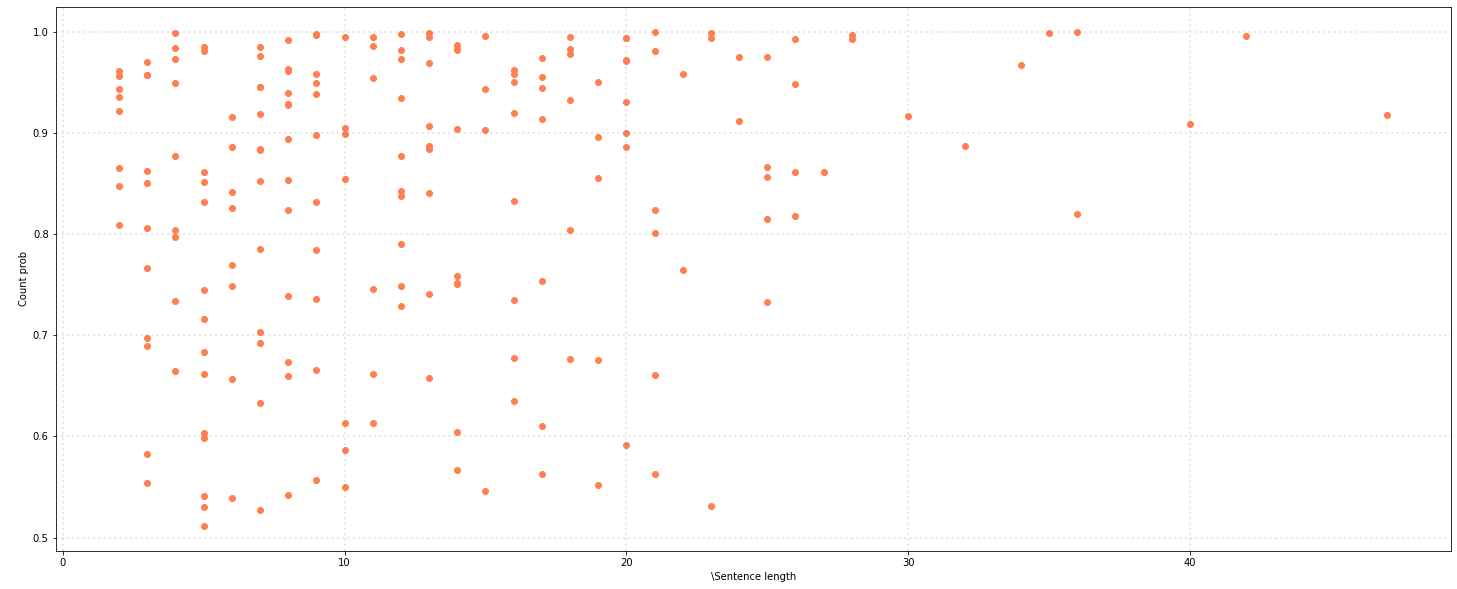

In [111]:
# Compare probabilities with sentence length: countvectorizer
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for i in range(len(sample_200)):
    ys = max(count_sample_probs[i])
    xs = len(sample_200[i].split(' '))
    ax.scatter(xs, ys, c='coral', marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\Sentence length')
ax.set_ylabel('\nCount prob')

plt.show()

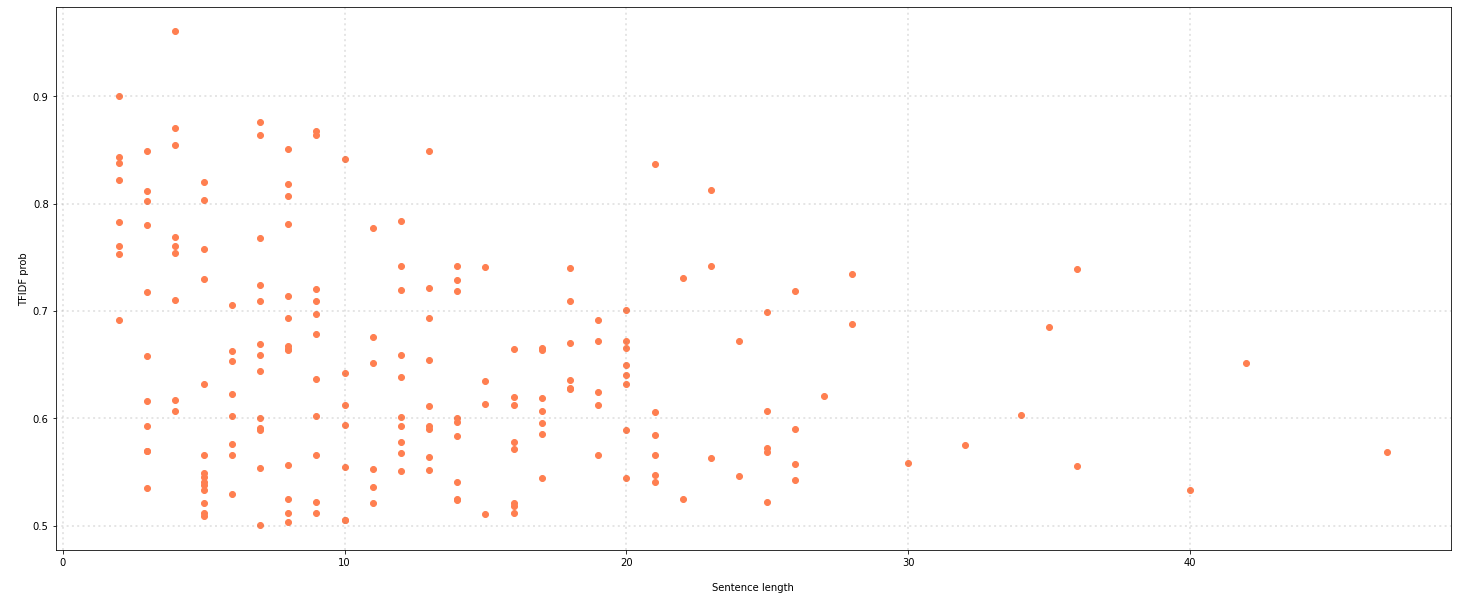

In [112]:
# Compare probabilities (Y) with sentence length (X): TFIDF
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for i in range(len(sample_200)):
    ys = max(tfidf_sample_probs[i])
    xs = len(sample_200[i].split(' '))
    ax.scatter(xs, ys, c='coral', marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nSentence length')
ax.set_ylabel('\nTFIDF prob')

plt.show()

Looks like the naive bayes CountVectorizer model favors longer sentences, possibly because their matrices are less sparse. The probabilities for the super long sentences are close to 1. But for the TFIDF model, the probabilities are a bit lower for longer sentences.

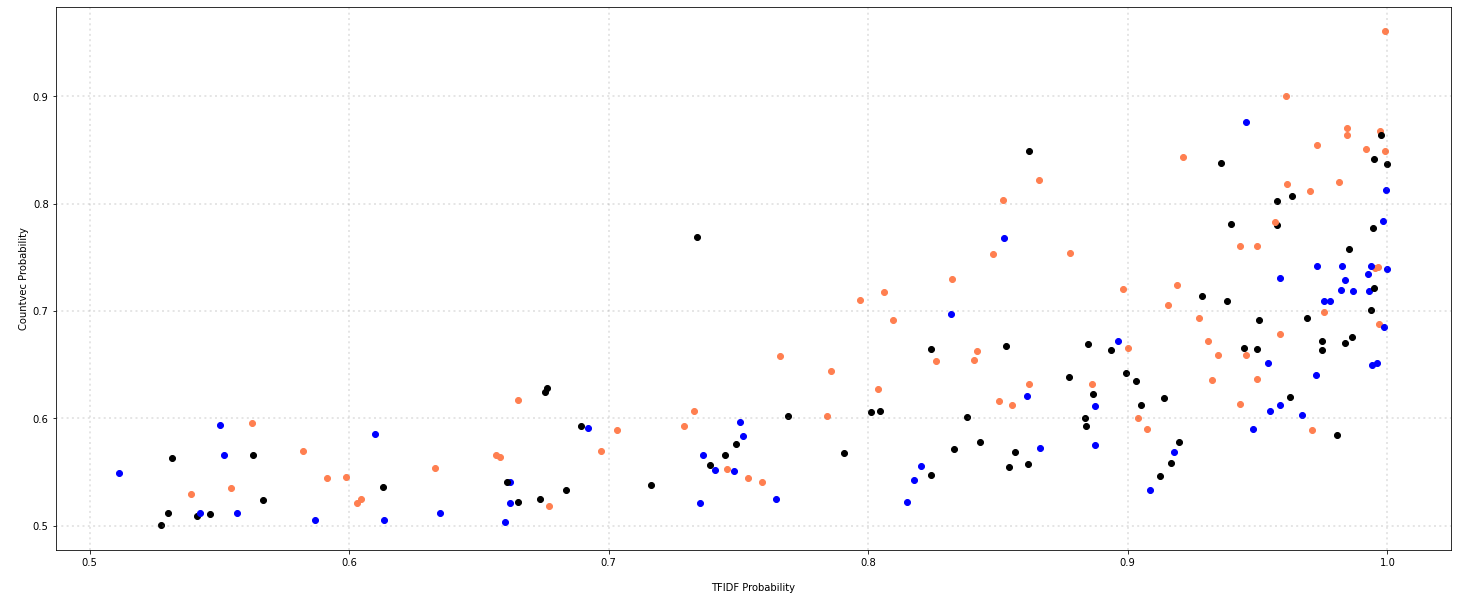

In [113]:
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()
color_dict = {'amazon': 'coral', 'imdb': 'blue', 'yelp': 'black'}
sources = sent_sample.source[0:200].to_numpy()
for i in range(len(sample_200)):
    color = color_dict[sources[i]]
    ys = max(tfidf_sample_probs[i])
    xs = max(count_sample_probs[i])
    ax.scatter(xs, ys, c=color, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nTFIDF Probability')
ax.set_ylabel('\nCountvec Probability')

plt.show()

#### My comments on the differences between the two models
The TF-IDF had higher accuracy on the test data than the CountVectorizer model. TF-IDF typically performs better because it weights features in a slightly more complex way, taking more information into consideration (not just pure frequency). Precision and Recall were pretty similarly balanced for both models according to the confusion matrices. Both models were sensitive to sentence length (the amount of tokens), but for the CountVectorizer, probabilities were higher for higher length sentences, and for TFIDF, probabilities were lower.

Areas that could be improved
- Preprocessing: removal of stopwords could be integrated, and that would especially help the countvectorizer, which has very inflated scores for words like "the." 
- Preprocessing: Stemming and Lemmatization could also be added in order for words like "drive" and "drives" to be considered the same feature. 
- The model could make use of bigrams as well as the existing unigrams, which provide more contextual information.
- I would also want to try using an SVM to see if it performs better than Naive Bayes. It might be a better fit with the sparsity and high dimensionality of the input vectors.


### 4) Areas for improvement in the lab code

1. Repetition
- for example, in the below, a dict comprehension could have been used with a list of the null values inserted in one line.

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]
Same with the dummy_duplicate_dict dict to a lesser extent.
           
- And in the document exploration section, there is a lot of printing that happens in a row instead of in a for loop, which requires less code and is less redundant.

2. Extra work
- The code leading up to and in exercise 13 creates a term_frequencies list with every single document. However, only the first 300 are considered for the resulting graph. Therefore, it would be much more efficient to just iterate the first 300 when creating the term_frequencies list.
- But a way to improve it even more is already written below. The `term_frequencies = np.asarray(X_counts.sum(axis=0))[0]` is more efficient and shorter and could be changed to just have X_counts[:300].